# Explore heuristic values for an empty maze

In [17]:
if(!"proxy" %in% rownames(installed.packages())) 
    install.packages("proxy", repos="http://cran.us.r-project.org")
library(proxy)

options(digits = 4)

## Create the maze representation

Define an empty $10 \times 10$ maze and place start and goal. 
__Note:__ indices start with 1 in R!

In [18]:
n <- 10
start <- cbind(2, 2)
goal <- cbind(9, 9)

maze <- matrix(" ", nrow = n, ncol = n)
maze[start] <- "S"
maze[goal] <- "G"
print(maze)

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,] " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  
 [2,] " "  "S"  " "  " "  " "  " "  " "  " "  " "  " "  
 [3,] " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  
 [4,] " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  
 [5,] " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  
 [6,] " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  
 [7,] " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  
 [8,] " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  
 [9,] " "  " "  " "  " "  " "  " "  " "  " "  "G"  " "  
[10,] " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  


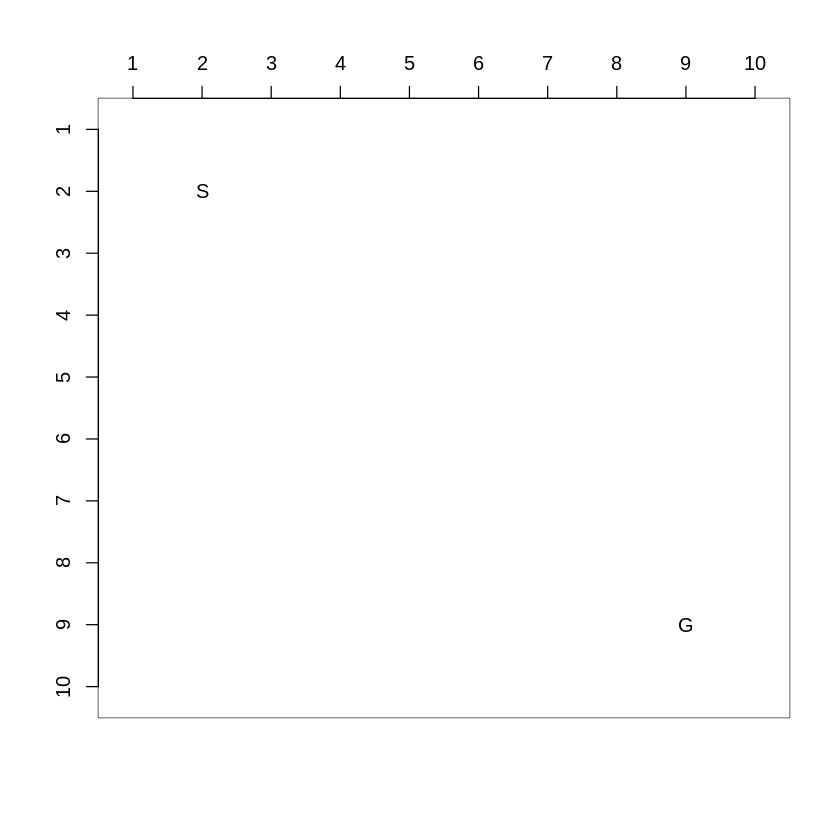

In [19]:
myimage <- function(x, col = hcl.colors(64, "YlOrRd", rev = TRUE), ...){
    image(x[,n:1], xaxt = "n", yaxt = "n", col = col, ...)
    axis(3, at = (0:(n-1))/(n-1), labels = 1:n)
    axis(2, at = (0:(n-1))/(n-1), labels = n:1)
    
    text((goal[2]-1)/(n-1),1-(goal[1]-1)/(n-1), "G")
    text((start[2]-1)/(n-1),1-(start[1]-1)/(n-1), "S")
}

myimage(maze != "", col = "white")

## GBFS: Use Manhattan Distance for $h(n)$

Manhattan distance is also called the $L_1$ norm. It is the difference in x values plus the differences in y values, i.e, $L_1(a,b) = |a_x-b_x| + |a_y - b_y|$.  

Manhattan distance is a perfect heuristic for the maze! $h(n) = h^*(n)$ and $f(n) = f^*(n)$ (the asterisk represents the optimal value).

Calculate $h(n)$

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,]   16   15   14   13   12   11   10    9    8     9
 [2,]   15   14   13   12   11   10    9    8    7     8
 [3,]   14   13   12   11   10    9    8    7    6     7
 [4,]   13   12   11   10    9    8    7    6    5     6
 [5,]   12   11   10    9    8    7    6    5    4     5
 [6,]   11   10    9    8    7    6    5    4    3     4
 [7,]   10    9    8    7    6    5    4    3    2     3
 [8,]    9    8    7    6    5    4    3    2    1     2
 [9,]    8    7    6    5    4    3    2    1    0     1
[10,]    9    8    7    6    5    4    3    2    1     2

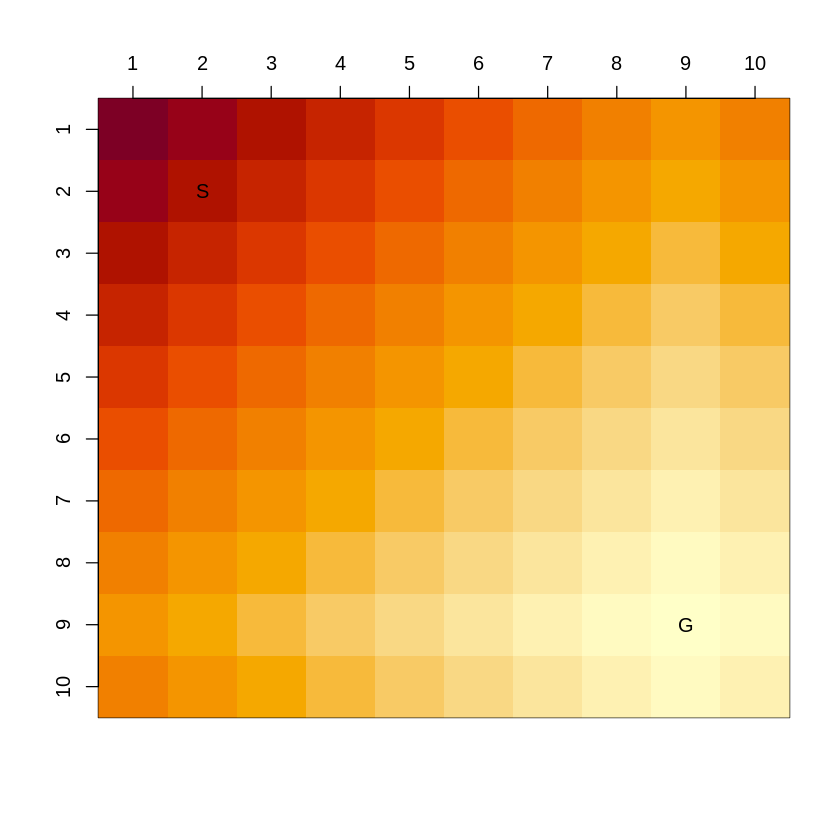

In [20]:
h_manhattan <- outer(1:n, 1:n, FUN = function(x,y) dist(cbind(x,y), goal, method = "manhattan"))
h_manhattan

myimage(h_manhattan)

The algorithm will follow the color gradient from dark red to light yellow.

## A* with Manhattan heuristic

Calculate $f(n) = g(n) + h(n)$ 

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,]   18   16   16   16   16   16   16   16   16    18
 [2,]   16   14   14   14   14   14   14   14   14    16
 [3,]   16   14   14   14   14   14   14   14   14    16
 [4,]   16   14   14   14   14   14   14   14   14    16
 [5,]   16   14   14   14   14   14   14   14   14    16
 [6,]   16   14   14   14   14   14   14   14   14    16
 [7,]   16   14   14   14   14   14   14   14   14    16
 [8,]   16   14   14   14   14   14   14   14   14    16
 [9,]   16   14   14   14   14   14   14   14   14    16
[10,]   18   16   16   16   16   16   16   16   16    18

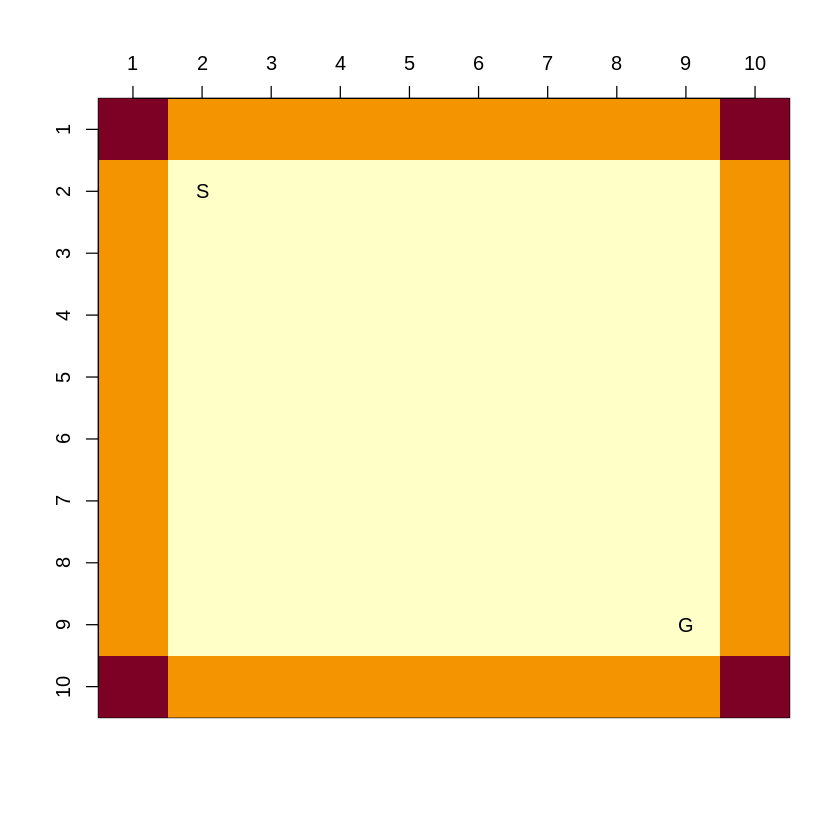

In [21]:
g <- outer(1:n, 1:n, FUN = function(x,y) dist(cbind(x,y), start, method = "manhattan"))
f <- g + h_manhattan      
f
           
myimage(f)

__Note:__ For Manhattan geometry, all paths that go directly from $S$ to $G$ are optimal and have the same distance. This creates the problem, that the agent faces with a perfect heuristic a plateau with positions that have all exactly the same $f(n) = C^*$! That means the agent will get lost on the plateau. All directions will be tied and the way we break ties is important!

http://theory.stanford.edu/~amitp/GameProgramming/Heuristics.html discusses this and other isses and suggests to increase the value of $f(n)$ by a small factor leading to weighted A* search discussed next.

## Weighted A* Search

Use $f(n) = g(n) + W \times h(n)$, with $W > 0$. This is not guaranteed optimal since the heuristic may become inadmissible with some $h(n) > h^*(n)$, but it helps with the search. It trades optimality with search cost (time and memory).

Let's try to inflate the heuristic by 10%. 

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,] 19.6 17.5 17.4 17.3 17.2 17.1 17.0 16.9 16.8  18.9
 [2,] 17.5 15.4 15.3 15.2 15.1 15.0 14.9 14.8 14.7  16.8
 [3,] 17.4 15.3 15.2 15.1 15.0 14.9 14.8 14.7 14.6  16.7
 [4,] 17.3 15.2 15.1 15.0 14.9 14.8 14.7 14.6 14.5  16.6
 [5,] 17.2 15.1 15.0 14.9 14.8 14.7 14.6 14.5 14.4  16.5
 [6,] 17.1 15.0 14.9 14.8 14.7 14.6 14.5 14.4 14.3  16.4
 [7,] 17.0 14.9 14.8 14.7 14.6 14.5 14.4 14.3 14.2  16.3
 [8,] 16.9 14.8 14.7 14.6 14.5 14.4 14.3 14.2 14.1  16.2
 [9,] 16.8 14.7 14.6 14.5 14.4 14.3 14.2 14.1 14.0  16.1
[10,] 18.9 16.8 16.7 16.6 16.5 16.4 16.3 16.2 16.1  18.2

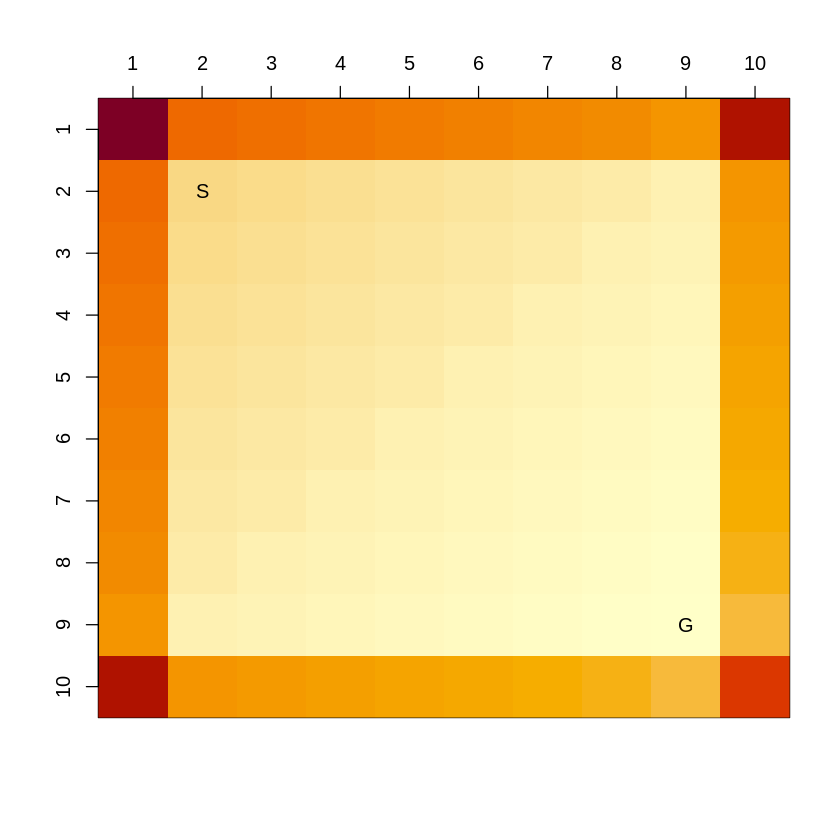

In [22]:
f <- g + 1.10 * h_manhattan
f



myimage(f)

It is hard to see, but the gradient leads directly from $S$ to $G$.

Let's try 500%. The larger $W$ gets, the closer we will get to GBFS (which completely ignores $g(n)$).

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,]   82   76   72   68   64   60   56   52   48    54
 [2,]   76   70   66   62   58   54   50   46   42    48
 [3,]   72   66   62   58   54   50   46   42   38    44
 [4,]   68   62   58   54   50   46   42   38   34    40
 [5,]   64   58   54   50   46   42   38   34   30    36
 [6,]   60   54   50   46   42   38   34   30   26    32
 [7,]   56   50   46   42   38   34   30   26   22    28
 [8,]   52   46   42   38   34   30   26   22   18    24
 [9,]   48   42   38   34   30   26   22   18   14    20
[10,]   54   48   44   40   36   32   28   24   20    26

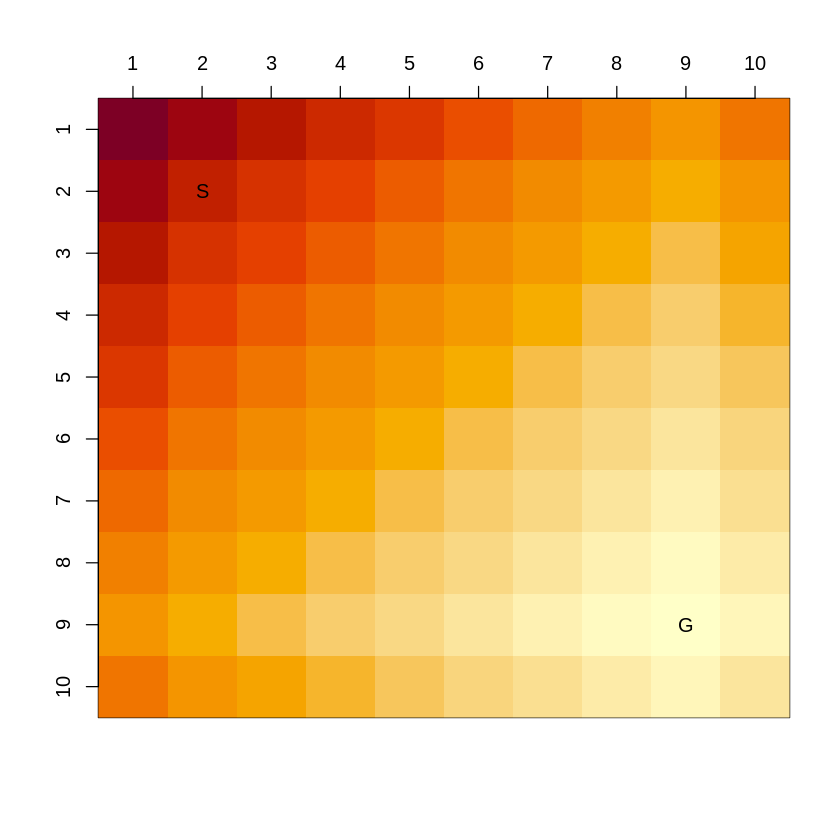

In [31]:
f <- g + 5 * h_manhattan
f

myimage(f)

Using $W<1$ will approximate Uniform-code Search/BFS and explore the area around $S$ first. Since a fraction of an admissible heuristic is still admissible, we are guaranteed optimality (as for BFS).

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,] 10.0  8.5  9.0  9.5 10.0 10.5 11.0 11.5 12.0  13.5
 [2,]  8.5  7.0  7.5  8.0  8.5  9.0  9.5 10.0 10.5  12.0
 [3,]  9.0  7.5  8.0  8.5  9.0  9.5 10.0 10.5 11.0  12.5
 [4,]  9.5  8.0  8.5  9.0  9.5 10.0 10.5 11.0 11.5  13.0
 [5,] 10.0  8.5  9.0  9.5 10.0 10.5 11.0 11.5 12.0  13.5
 [6,] 10.5  9.0  9.5 10.0 10.5 11.0 11.5 12.0 12.5  14.0
 [7,] 11.0  9.5 10.0 10.5 11.0 11.5 12.0 12.5 13.0  14.5
 [8,] 11.5 10.0 10.5 11.0 11.5 12.0 12.5 13.0 13.5  15.0
 [9,] 12.0 10.5 11.0 11.5 12.0 12.5 13.0 13.5 14.0  15.5
[10,] 13.5 12.0 12.5 13.0 13.5 14.0 14.5 15.0 15.5  17.0

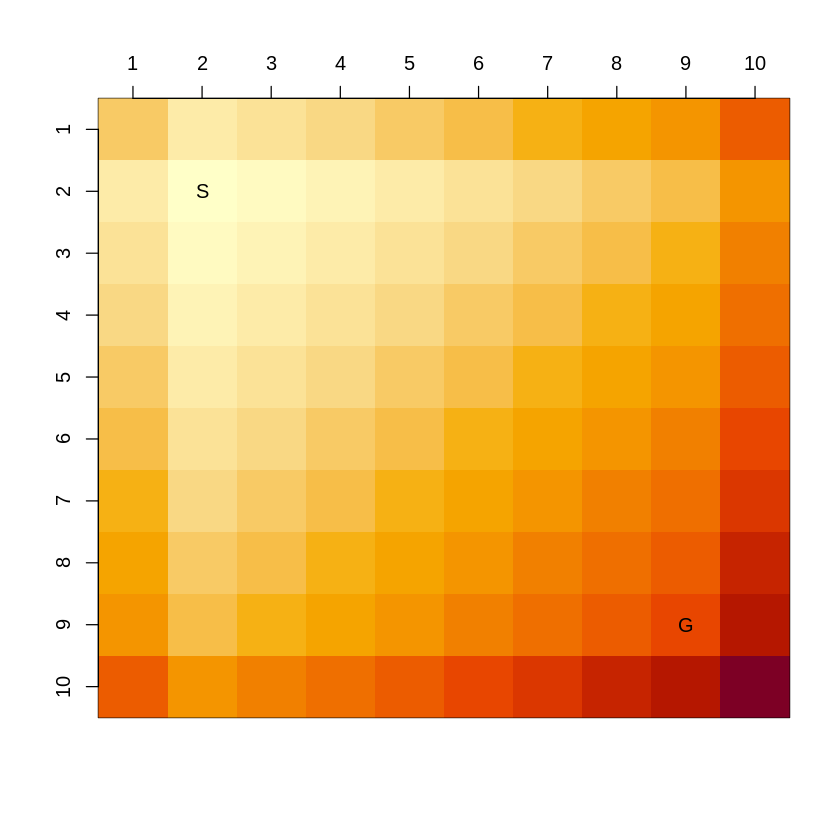

In [24]:
f <- g + .5 * h_manhattan
f

myimage(f)

## GBFS with Euclidean Distance for $h(n)$

Euclidean distance, or $L_2$ norm defined as $L_2 = \sqrt{(a_x-b_x)^2 + (a_y-b_y)^2}$.
It is not perfect if the true cost follows the Manhattan distance, i.e., $h(n) \le h^*(n)$ and $f(n) \le f^*(n)$

      [,1]   [,2]   [,3]   [,4]   [,5]   [,6]   [,7]   [,8]   [,9]   [,10] 
 [1,] 11.314 10.630 10.000  9.434  8.944  8.544  8.246  8.062  8.000  8.062
 [2,] 10.630  9.899  9.220  8.602  8.062  7.616  7.280  7.071  7.000  7.071
 [3,] 10.000  9.220  8.485  7.810  7.211  6.708  6.325  6.083  6.000  6.083
 [4,]  9.434  8.602  7.810  7.071  6.403  5.831  5.385  5.099  5.000  5.099
 [5,]  8.944  8.062  7.211  6.403  5.657  5.000  4.472  4.123  4.000  4.123
 [6,]  8.544  7.616  6.708  5.831  5.000  4.243  3.606  3.162  3.000  3.162
 [7,]  8.246  7.280  6.325  5.385  4.472  3.606  2.828  2.236  2.000  2.236
 [8,]  8.062  7.071  6.083  5.099  4.123  3.162  2.236  1.414  1.000  1.414
 [9,]  8.000  7.000  6.000  5.000  4.000  3.000  2.000  1.000  0.000  1.000
[10,]  8.062  7.071  6.083  5.099  4.123  3.162  2.236  1.414  1.000  1.414

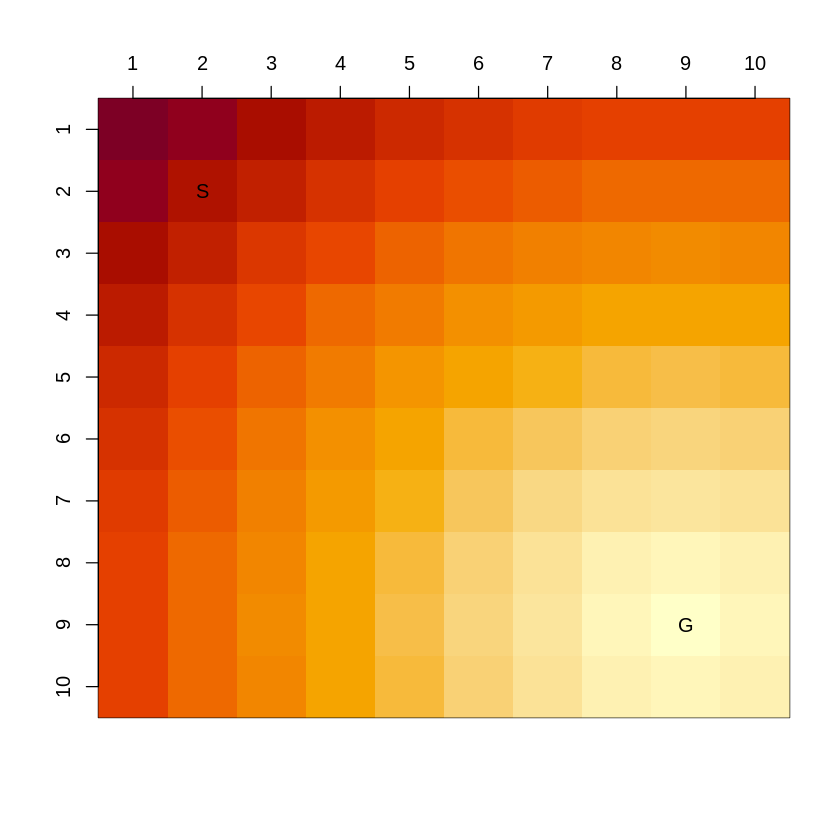

In [25]:
h_euclidean <- outer(1:n, 1:n, FUN = function(x,y) dist(cbind(x,y), goal, method = "euclidean"))
h_euclidean

myimage(h_euclidean)

## A* with Euclidean Distance for $h(n)$

      [,1]   [,2]   [,3]   [,4]   [,5]   [,6]   [,7]   [,8]   [,9]   [,10] 
 [1,] 13.314 11.630 12.000 12.434 12.944 13.544 14.246 15.062 16.000 17.062
 [2,] 11.630  9.899 10.220 10.602 11.062 11.616 12.280 13.071 14.000 15.071
 [3,] 12.000 10.220 10.485 10.810 11.211 11.708 12.325 13.083 14.000 15.083
 [4,] 12.434 10.602 10.810 11.071 11.403 11.831 12.385 13.099 14.000 15.099
 [5,] 12.944 11.062 11.211 11.403 11.657 12.000 12.472 13.123 14.000 15.123
 [6,] 13.544 11.616 11.708 11.831 12.000 12.243 12.606 13.162 14.000 15.162
 [7,] 14.246 12.280 12.325 12.385 12.472 12.606 12.828 13.236 14.000 15.236
 [8,] 15.062 13.071 13.083 13.099 13.123 13.162 13.236 13.414 14.000 15.414
 [9,] 16.000 14.000 14.000 14.000 14.000 14.000 14.000 14.000 14.000 16.000
[10,] 17.062 15.071 15.083 15.099 15.123 15.162 15.236 15.414 16.000 17.414

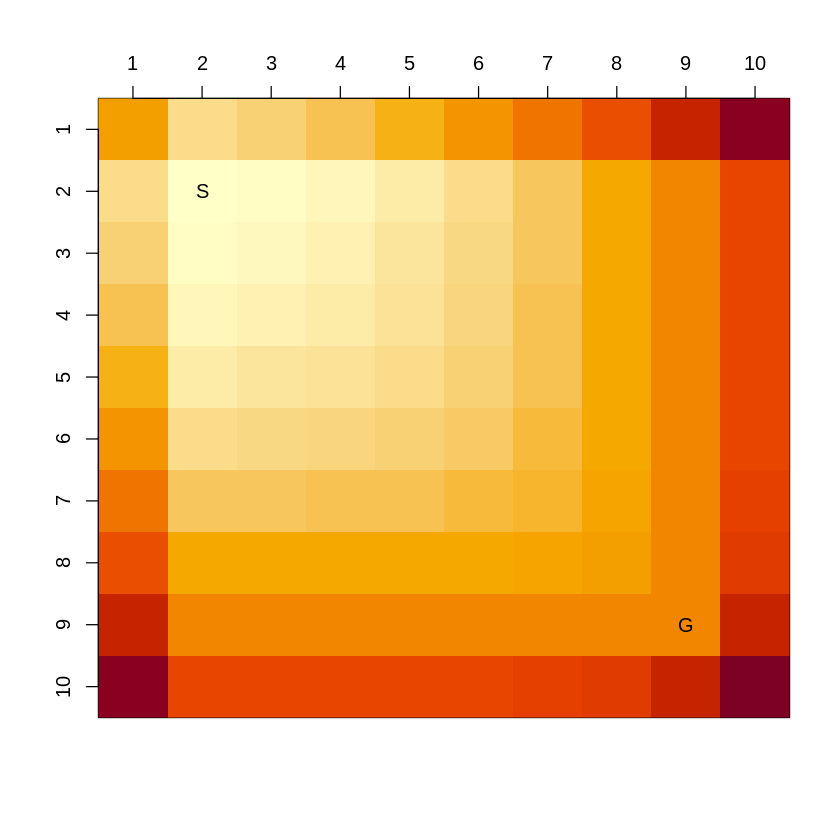

In [26]:
f <- g + h_euclidean
f

myimage(f)

__Note:__ Euclidean and Manhattan space do not mix well! The gradient is actually from goal to start!

A* expands all nodes with $f(n)<C^*$ and some with $f(n) \leq C^*$ shown below in light grey.

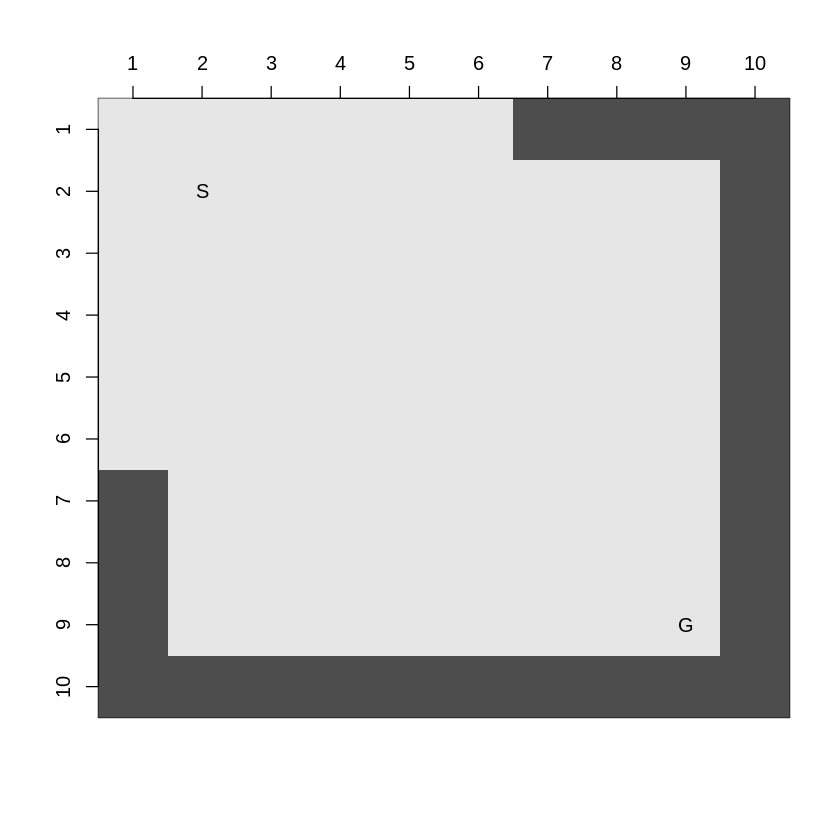

In [27]:
myimage(f <= f[goal], col = grey.colors(2))

## What if we can also move diagonally at a cost of 1?

Now distances are measured by $L_\infty$ which is also called the maximum norm and defined as $L_\infty(a,b) = max(|a_x-b_x|, |a_y-b_y|)$.

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,]    9    9    9   10   11   12   13   14   15    16
 [2,]    9    7    8    9   10   11   12   13   14    15
 [3,]    9    8    7    8    9   10   11   12   13    14
 [4,]   10    9    8    7    8    9   10   11   12    13
 [5,]   11   10    9    8    7    8    9   10   11    12
 [6,]   12   11   10    9    8    7    8    9   10    11
 [7,]   13   12   11   10    9    8    7    8    9    10
 [8,]   14   13   12   11   10    9    8    7    8     9
 [9,]   15   14   13   12   11   10    9    8    7     9
[10,]   16   15   14   13   12   11   10    9    9     9

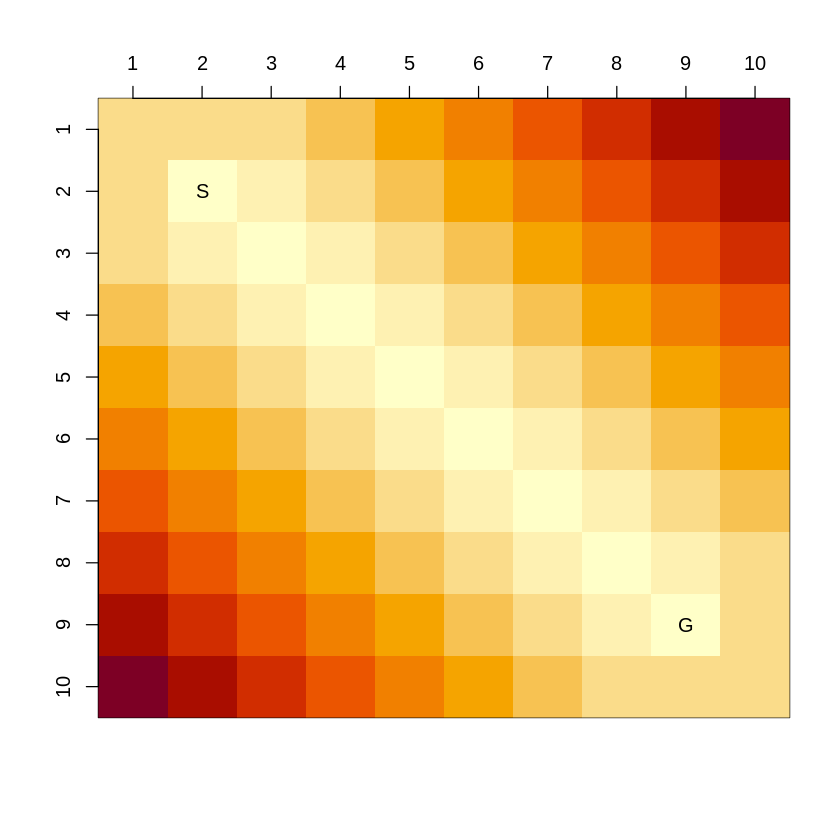

In [28]:
g_max <- outer(1:n, 1:n, FUN = function(x,y) dist(cbind(x,y), start, method = "maximum"))          
h_max <- outer(1:n, 1:n, FUN = function(x,y) dist(cbind(x,y), goal, method = "maximum"))

f <- g_max + h_max
f
                     
myimage(f)

## What if we could also move any distance into any direction at any angle?

Now distances and cost are measured using Euclidean distance. Note that the squares are now just
a search grid showing some location and all locations in between are possible. A larger grid would provide a more detailed visualization. 


The heuristic below works perfectly.

      [,1]   [,2]   [,3]   [,4]   [,5]   [,6]   [,7]   [,8]   [,9]   [,10] 
 [1,] 12.728 11.630 11.414 11.670 12.107 12.667 13.345 14.145 15.071 16.125
 [2,] 11.630  9.899 10.220 10.602 11.062 11.616 12.280 13.071 14.000 15.071
 [3,] 11.414 10.220  9.899 10.046 10.373 10.831 11.424 12.166 13.071 14.145
 [4,] 11.670 10.602 10.046  9.899 10.009 10.303 10.770 11.424 12.280 13.345
 [5,] 12.107 11.062 10.373 10.009  9.899 10.000 10.303 10.831 11.616 12.667
 [6,] 12.667 11.616 10.831 10.303 10.000  9.899 10.009 10.373 11.062 12.107
 [7,] 13.345 12.280 11.424 10.770 10.303 10.009  9.899 10.046 10.602 11.670
 [8,] 14.145 13.071 12.166 11.424 10.831 10.373 10.046  9.899 10.220 11.414
 [9,] 15.071 14.000 13.071 12.280 11.616 11.062 10.602 10.220  9.899 11.630
[10,] 16.125 15.071 14.145 13.345 12.667 12.107 11.670 11.414 11.630 12.728

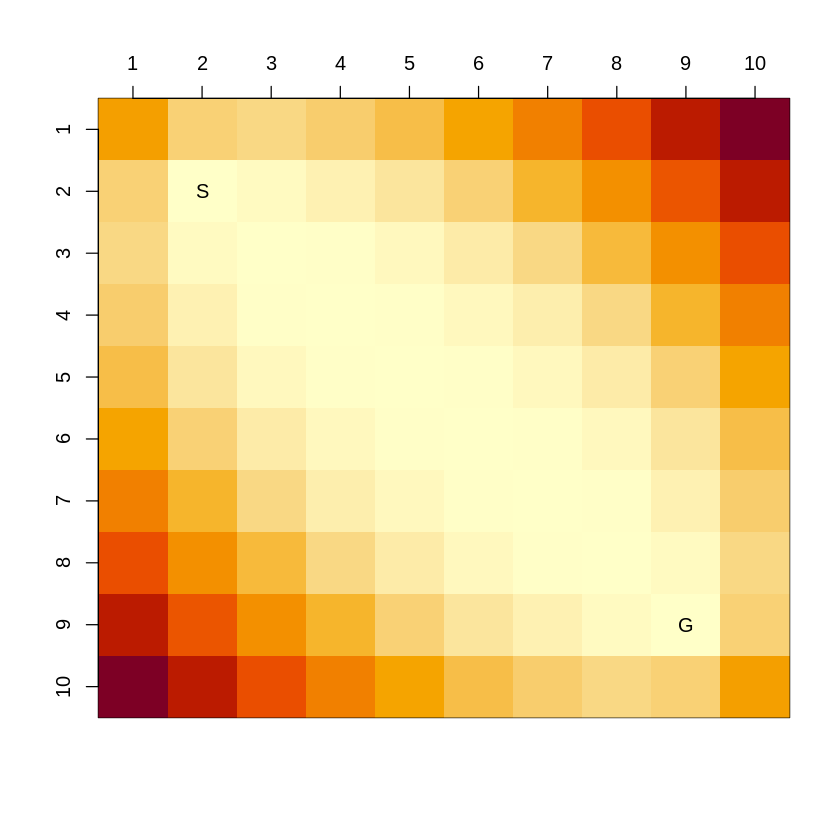

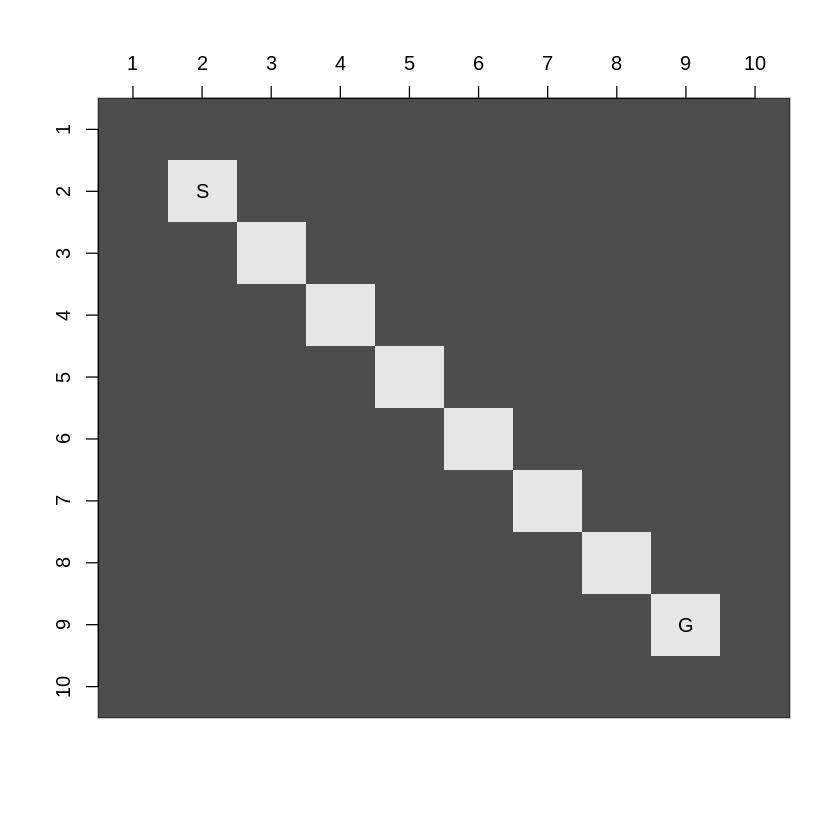

In [29]:
g_euclidean <- outer(1:n, 1:n, FUN = function(x,y) dist(cbind(x,y), start, method = "euclidean"))          
f <- g_euclidean + h_euclidean
f
                     
myimage(f)
                     
# the search will expand:
myimage(f <= f[goal], col = grey.colors(2))

Using Manhattan distance for the heuristic still works fine, but A* is not guaranteed to be optimal, because it is not an admissible heuristic with Manhattan distances often overestimating the true Euclidean distances! 

      [,1]   [,2]   [,3]   [,4]   [,5]   [,6]   [,7]   [,8]   [,9]   [,10] 
 [1,] 17.414 16.000 15.414 15.236 15.162 15.123 15.099 15.083 15.071 17.062
 [2,] 16.000 14.000 14.000 14.000 14.000 14.000 14.000 14.000 14.000 16.000
 [3,] 15.414 14.000 13.414 13.236 13.162 13.123 13.099 13.083 13.071 15.062
 [4,] 15.236 14.000 13.236 12.828 12.606 12.472 12.385 12.325 12.280 14.246
 [5,] 15.162 14.000 13.162 12.606 12.243 12.000 11.831 11.708 11.616 13.544
 [6,] 15.123 14.000 13.123 12.472 12.000 11.657 11.403 11.211 11.062 12.944
 [7,] 15.099 14.000 13.099 12.385 11.831 11.403 11.071 10.810 10.602 12.434
 [8,] 15.083 14.000 13.083 12.325 11.708 11.211 10.810 10.485 10.220 12.000
 [9,] 15.071 14.000 13.071 12.280 11.616 11.062 10.602 10.220  9.899 11.630
[10,] 17.062 16.000 15.062 14.246 13.544 12.944 12.434 12.000 11.630 13.314

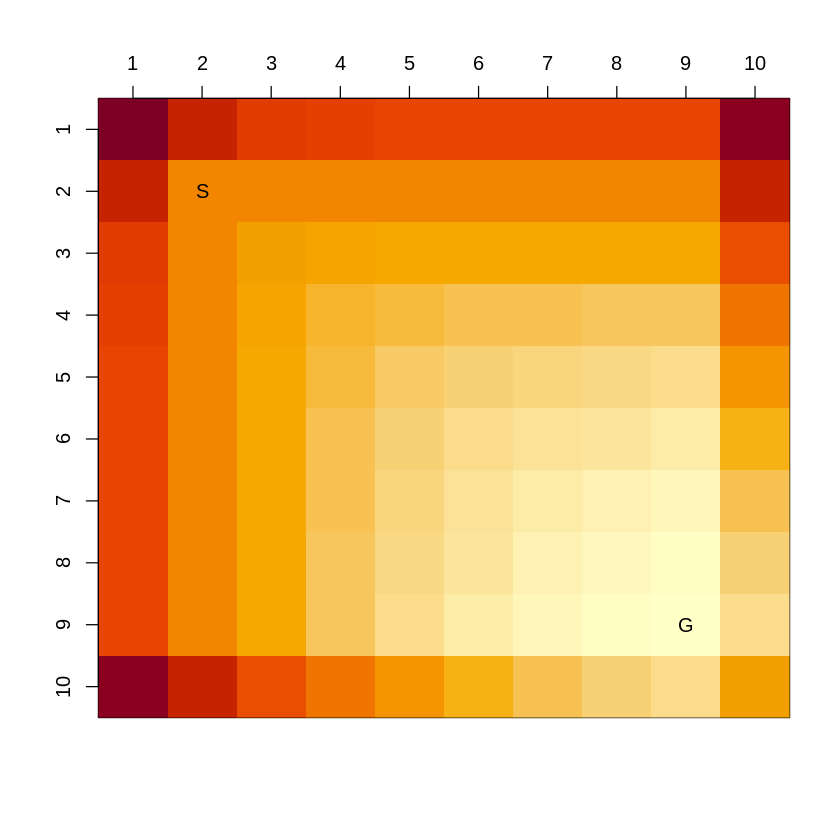

In [30]:
f <- g_euclidean + h_manhattan
f
                     
myimage(f)

__Note:__ The search still starts at $S$ and will go also directly from $S$ to $G$ following the gradient.